In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/wine_fraud.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
# Target column
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

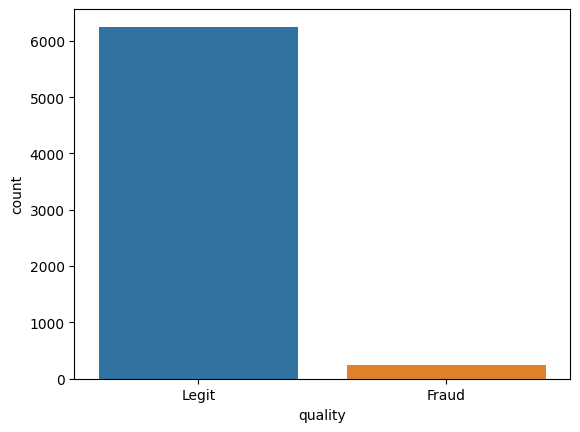

In [6]:
# the count per category of Legit vs Fraud.
sns.countplot(data=df,x='quality')

<Axes: xlabel='type', ylabel='count'>

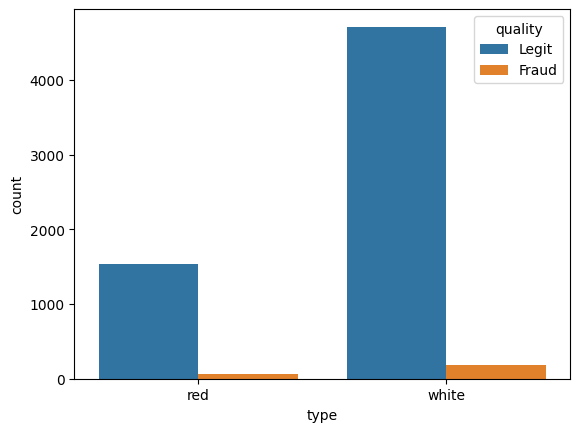

In [7]:
# Target distribution
sns.countplot(data=df,x='type',hue='quality')

In [8]:
# Map target to int instead of str
mymap = {'Fraud':1,'Legit':0}

In [9]:
df['Fraud'] = df['quality'].map(mymap)

In [10]:
# correlation
df.corr()['Fraud'][:-1]

<ipython-input-10-f89a15f1a051>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fraud'][:-1]


fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Name: Fraud, dtype: float64

<ipython-input-11-07667ae93fa7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.Series(df.corr()['Fraud'][:-1]).sort_values().plot(kind='bar')


<Axes: >

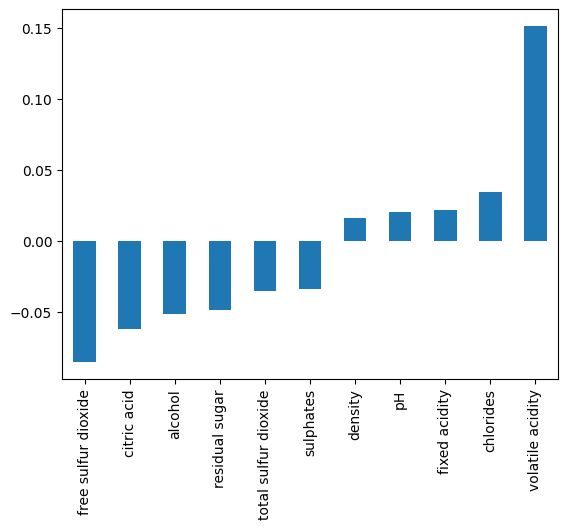

In [11]:
# bar plot of the correlation values to Fraudlent wine.
pd.Series(df.corr()['Fraud'][:-1]).sort_values().plot(kind='bar')

----
## SVM


In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'Fraud'],
      dtype='object')

In [13]:
df = df.drop('Fraud',axis=1)

In [14]:
df['type']=pd.get_dummies(df['type'],drop_first=True)

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [16]:
X = df.drop('quality',axis=1)
y = df['quality']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
print(X_train.shape)
print(X_test.shape)

(5847, 12)
(650, 12)


**Scale the X train and X test data.**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler =  StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
# Support Vector Machine
from sklearn.svm import SVC

svc_model  = SVC(class_weight='balanced')

In [24]:
# GridSearchCV to run a grid search for the best C and gamma parameters
from sklearn.model_selection import GridSearchCV

In [25]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [26]:
param_grid = {'C': [1.0,0.01,0.5,2,3,4.5,20,10,0.12,7],'gamma': ['scale','auto']}

In [27]:
grid_model = GridSearchCV(svc_model,param_grid)

In [28]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1.0, 0.01, 0.5, 2, 3, 4.5, 20, 10, 0.12, 7],
                         'gamma': ['scale', 'auto']})

In [29]:
grid_model.best_params_

{'C': 20, 'gamma': 'scale'}

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
grid_preds = grid_model.predict(scaled_X_test)

In [32]:
confusion_matrix(y_test,grid_preds)

array([[ 12,  15],
       [ 53, 570]])

In [33]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

       Fraud       0.18      0.44      0.26        27
       Legit       0.97      0.91      0.94       623

    accuracy                           0.90       650
   macro avg       0.58      0.68      0.60       650
weighted avg       0.94      0.90      0.92       650

